In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [33]:
pokemon = pd.read_csv('/content/datasets_121_280_Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [34]:
pokemon = pokemon.drop('#', axis =1)

In [35]:
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [36]:
pokemon.shape

(800, 12)

In [37]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Exploratory Data Analysis

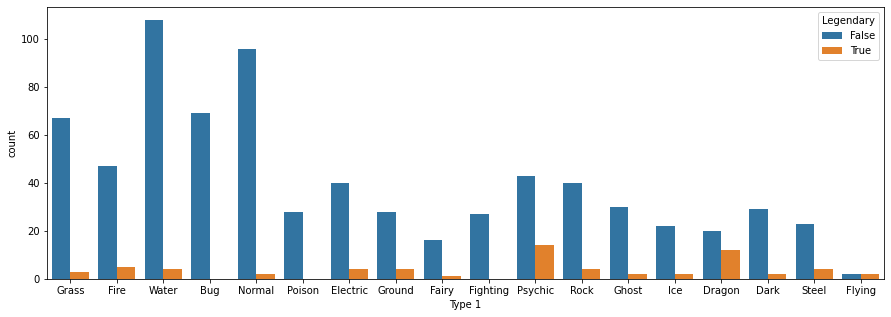

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(pokemon['Type 1'], hue = 'Legendary', data = pokemon)#type1 is Each pokemon has a type, this determines weakness/resistance to attacks

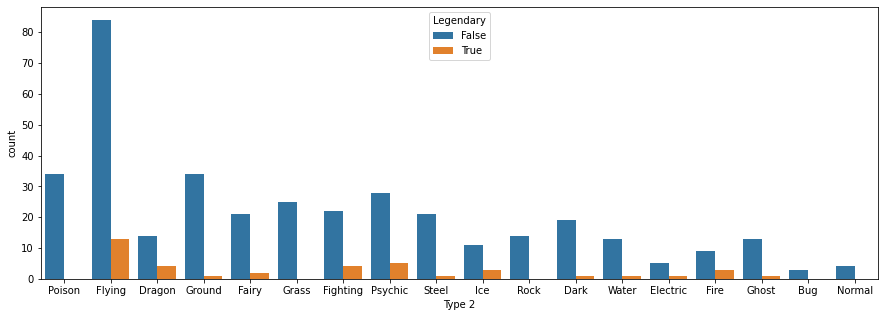

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(pokemon['Type 2'], hue = 'Legendary', data = pokemon) 

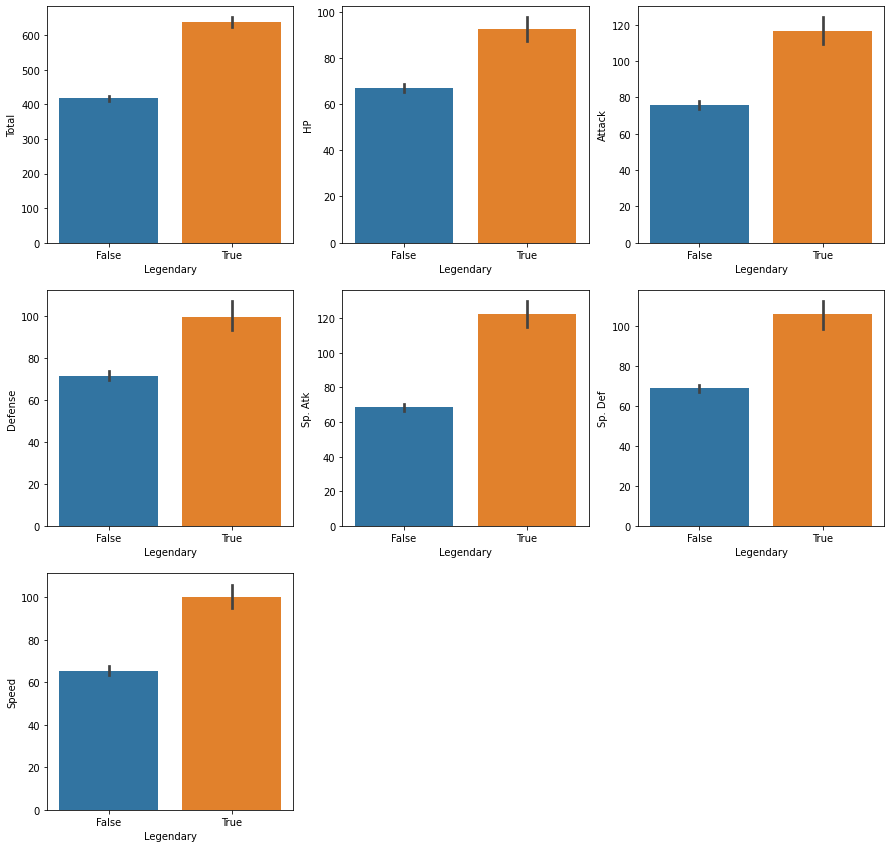

In [40]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.barplot(x = 'Legendary', y ='Total', data = pokemon)# Total is sum of all stats that come after this, a general guide to how strong a pokemon is
plt.subplot(4,3,2)
sns.barplot(x = 'Legendary', y ='HP', data = pokemon)#HP is hit points, or health, defines how much damage a pokemon can withstand before fainting
plt.subplot(4,3,3)
sns.barplot(x = 'Legendary', y ='Attack', data = pokemon) # the base modifier for normal attacks 
plt.subplot(4,3,4)
sns.barplot(x = 'Legendary', y ='Defense', data = pokemon)# the base damage resistance against normal attacks
plt.subplot(4,3,5)
sns.barplot(x = 'Legendary', y ='Sp. Atk', data = pokemon)
plt.subplot(4,3,6)
sns.barplot(x = 'Legendary', y ='Sp. Def', data = pokemon)
plt.subplot(4,3,7)
sns.barplot(x = 'Legendary', y ='Speed', data = pokemon)

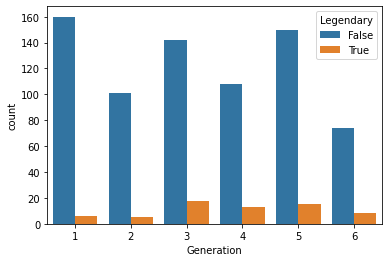

In [41]:
sns.countplot(x = 'Generation', hue = 'Legendary', data = pokemon)

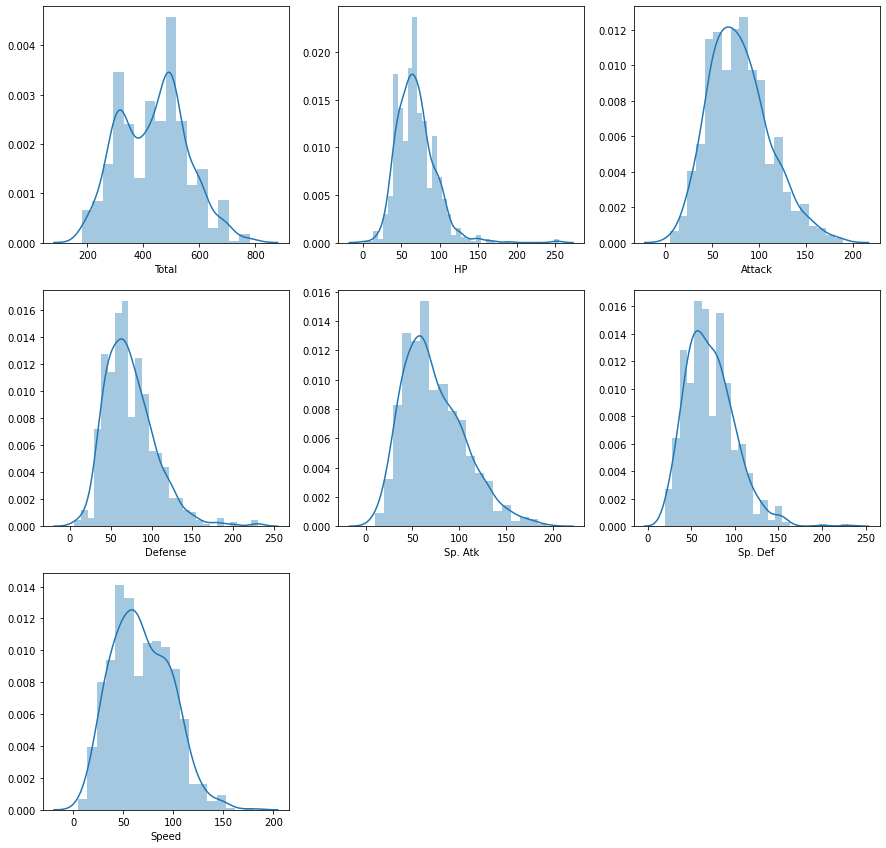

In [42]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.distplot(pokemon['Total'])# Total is sum of all stats that come after this, a general guide to how strong a pokemon is
plt.subplot(4,3,2)
sns.distplot(pokemon['HP'])#HP is hit points, or health, defines how much damage a pokemon can withstand before fainting
plt.subplot(4,3,3)
sns.distplot(pokemon['Attack']) # the base modifier for normal attacks 
plt.subplot(4,3,4)
sns.distplot(pokemon['Defense'])# the base damage resistance against normal attacks
plt.subplot(4,3,5)
sns.distplot(pokemon['Sp. Atk'])
plt.subplot(4,3,6)
sns.distplot(pokemon['Sp. Def'])
plt.subplot(4,3,7)
sns.distplot(pokemon['Speed'])

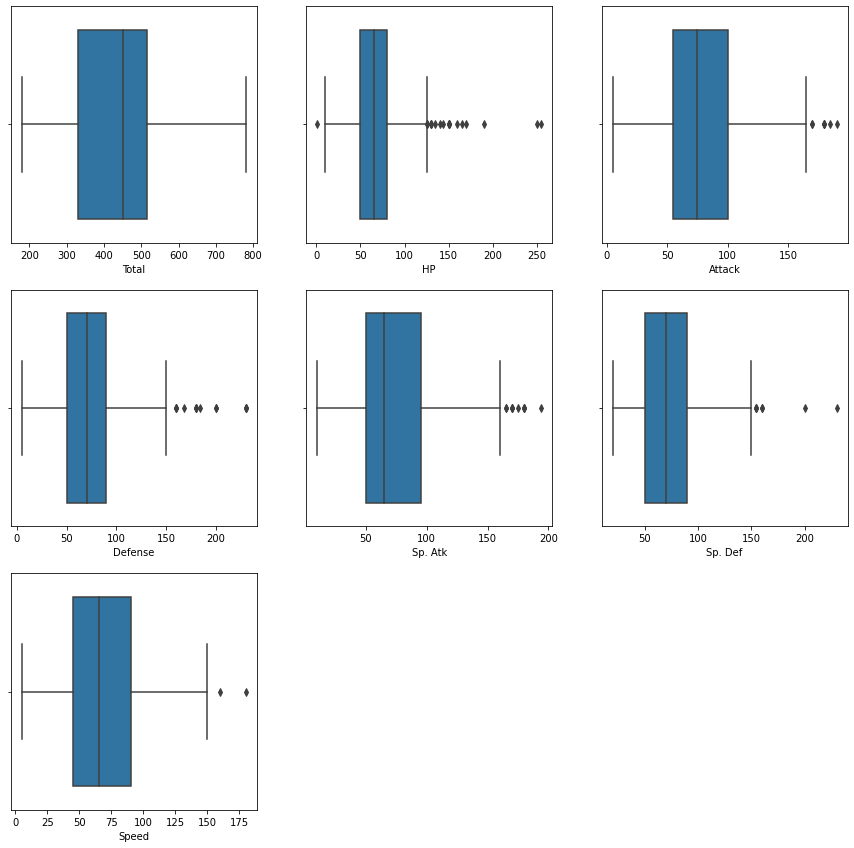

In [43]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.boxplot(pokemon['Total'])# Total is sum of all stats that come after this, a general guide to how strong a pokemon is
plt.subplot(4,3,2)
sns.boxplot(pokemon['HP'])#HP is hit points, or health, defines how much damage a pokemon can withstand before fainting
plt.subplot(4,3,3)
sns.boxplot(pokemon['Attack']) # the base modifier for normal attacks 
plt.subplot(4,3,4)
sns.boxplot(pokemon['Defense'])# the base damage resistance against normal attacks
plt.subplot(4,3,5)
sns.boxplot(pokemon['Sp. Atk'])
plt.subplot(4,3,6)
sns.boxplot(pokemon['Sp. Def'])
plt.subplot(4,3,7)
sns.boxplot(pokemon['Speed'])

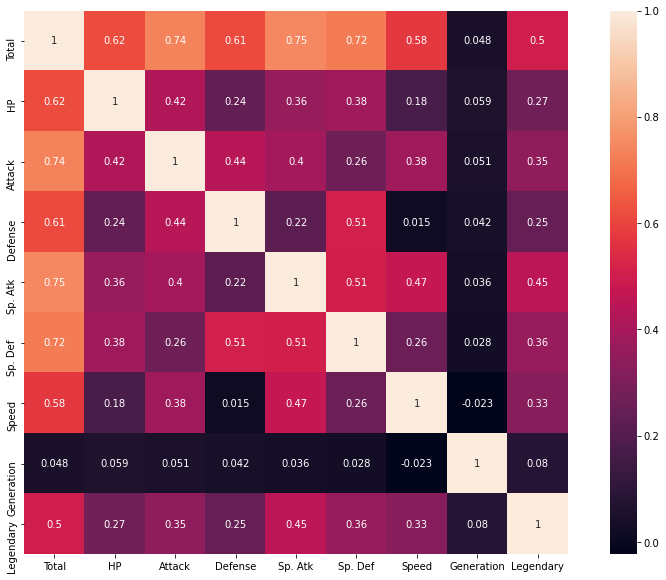

In [44]:
plt.figure(figsize=(15,10)) #manage the size of the plot
sns.heatmap(pokemon.corr(),annot=True, square = True) 
plt.show()

In [45]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [46]:
pokemon = pokemon.drop(columns=['Name', 'Type 2'], axis = 1)

Outlier Detection

In [47]:
from scipy import stats
z=np.abs(stats.zscore(pokemon['HP']))
threshold=3
print(np.where(z>3))

(array([121, 155, 217, 261, 313, 351, 473, 544, 545, 655]),)


In [48]:
from scipy import stats
z=np.abs(stats.zscore(pokemon['Attack']))
threshold=3
print(np.where(z>3))

(array([163, 232, 424, 426, 429]),)


In [49]:
from scipy import stats
z=np.abs(stats.zscore(pokemon['Defense']))
threshold=3
print(np.where(z>3))

(array([ 87,  98, 223, 224, 230, 332, 333, 414, 456, 789]),)


In [50]:
from scipy import stats
z=np.abs(stats.zscore(pokemon['Sp. Atk']))
threshold=3
print(np.where(z>3))

(array([ 71, 164, 422, 426, 429]),)


In [51]:
from scipy import stats
z=np.abs(stats.zscore(pokemon['Sp. Def']))
threshold=3
print(np.where(z>3))

(array([230, 415, 422, 430]),)


In [52]:
df1=pokemon[(z< 3)]
print(df1)

      Type 1  Total  HP  Attack  ...  Sp. Def  Speed  Generation  Legendary
0      Grass    318  45      49  ...       65     45           1      False
1      Grass    405  60      62  ...       80     60           1      False
2      Grass    525  80      82  ...      100     80           1      False
3      Grass    625  80     100  ...      120     80           1      False
4       Fire    309  39      52  ...       50     65           1      False
..       ...    ...  ..     ...  ...      ...    ...         ...        ...
795     Rock    600  50     100  ...      150     50           6       True
796     Rock    700  50     160  ...      110    110           6       True
797  Psychic    600  80     110  ...      130     70           6       True
798  Psychic    680  80     160  ...      130     80           6       True
799     Fire    600  80     110  ...       90     70           6       True

[796 rows x 10 columns]


In [53]:
df1.shape

(796, 10)

In [54]:
df1['Type 1']= df1['Type 1'].astype('category')
df1['Type 1']= df1['Type 1'].cat.codes

df1['Legendary']= df1['Legendary'].astype('category')
df1['Legendary']= df1['Legendary'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [55]:
df1.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,318,45,49,49,65,65,45,1,0
1,9,405,60,62,63,80,80,60,1,0
2,9,525,80,82,83,100,100,80,1,0
3,9,625,80,100,123,122,120,80,1,0
4,6,309,39,52,43,60,50,65,1,0


In [57]:
X = df1.drop('Legendary', axis =1)
y = df1['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [66]:
def model_train(classifier, X_train, y_train, X_test, y_test):
  model =classifier.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print('Accuracy of model is ', accuracy_score(y_test, y_pred))

In [67]:
model_train(LogisticRegression(),X_train, y_train, X_test, y_test )

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       144
           1       0.75      0.19      0.30        16

    accuracy                           0.91       160
   macro avg       0.83      0.59      0.63       160
weighted avg       0.90      0.91      0.89       160

Accuracy of model is  0.9125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
model_train(RandomForestClassifier(),X_train, y_train, X_test, y_test )

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       144
           1       0.68      0.81      0.74        16

    accuracy                           0.94       160
   macro avg       0.83      0.89      0.86       160
weighted avg       0.95      0.94      0.95       160

Accuracy of model is  0.94375


In [69]:
model_train(GradientBoostingClassifier(),X_train, y_train, X_test, y_test )

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       144
           1       0.61      0.69      0.65        16

    accuracy                           0.93       160
   macro avg       0.79      0.82      0.80       160
weighted avg       0.93      0.93      0.93       160

Accuracy of model is  0.925


In [70]:
model_train(BaggingClassifier(),X_train, y_train, X_test, y_test )

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       144
           1       0.67      0.75      0.71        16

    accuracy                           0.94       160
   macro avg       0.82      0.85      0.84       160
weighted avg       0.94      0.94      0.94       160

Accuracy of model is  0.9375


In [71]:
model_train(xgb.XGBClassifier(),X_train, y_train, X_test, y_test )

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       144
           1       0.61      0.69      0.65        16

    accuracy                           0.93       160
   macro avg       0.79      0.82      0.80       160
weighted avg       0.93      0.93      0.93       160

Accuracy of model is  0.925


Improvements can be done using hyper parameter tuning